# Regresión por Mínimos Cuadrados:

El **Método de Mínimos Cuadrados** es una técnica de optimización matemática utilizada en regresión para minimizar el error entre los valores observados y predichos. En el presente cuaderno usaremos librerias de Python que ya tienen implementaciones para el método de mínimos cuadrados.

In [4]:
# Importar las bibliotecas necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error




### Objetivo de los Mínimos Cuadrados
El método de **Regresión por Mínimos Cuadrados** minimiza la suma de residuos al cuadrado:
$$RSS = \sum_{i=1}^n (y_i - \hat{y}_i)^2$$
donde:
- $y_i$ es el valor observado.
- $\hat{y}_i$ es el valor predicho.

### Modelo de Regresión Lineal
Para una regresión lineal simple:
$$y = \beta_0 + \beta_1 x + \epsilon$$
donde:
- $\beta_0$ es el intercepto (valor de $y$ cuando $x = 0$).
- $\beta_1$ es la pendiente (cambio en $y$ por unidad de cambio en $x$).

En este modelo, buscamos estimar los valores de $\beta_0$ y $\beta_1$ que minimicen el error.


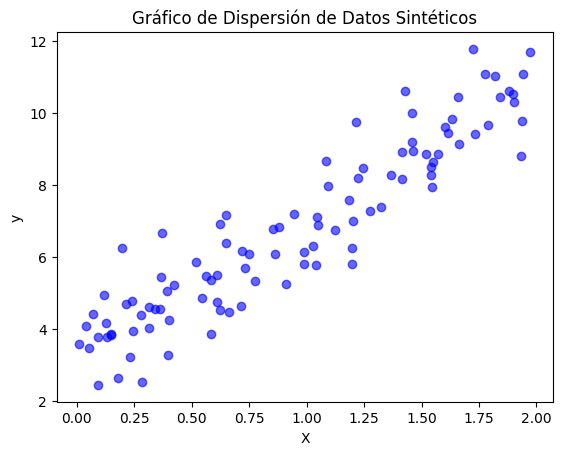

In [5]:
# Generar datos sintéticos
np.random.seed(42)  # Fijar la semilla para reproducibilidad

# Crear datos
n = 100
X = 2 * np.random.rand(n, 1)
y = 3 + 4 * X + np.random.randn(n, 1)

# Graficar los datos
plt.scatter(X, y, color="blue", alpha=0.6)
plt.title("Gráfico de Dispersión de Datos Sintéticos")
plt.xlabel("X")
plt.ylabel("y")
plt.show()


## 2. Ajuste del Modelo de Regresión Lineal

Utilizaremos el conjunto de datos sintéticos generado anteriormente para ajustar un modelo de regresión lineal simple. Dividiremos los datos en dos partes:
- **Entrenamiento:** Para entrenar el modelo.
- **Prueba:** Para evaluar el rendimiento del modelo.

Luego, calcularemos los coeficientes del modelo:
- **Intercepto $\beta_0$**.
- **Pendiente $\beta_1$**.


In [6]:
# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo de regresión lineal
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Imprimir los coeficientes
print("Intercepto:", lin_reg.intercept_)
print("Pendiente:", lin_reg.coef_)


Intercepto: [3.14291332]
Pendiente: [[3.79932366]]


### Evaluación del Modelo

Una vez que el modelo ha sido entrenado, lo evaluaremos utilizando el **Error Cuadrático Medio (MSE)**:
$$MSE = \frac{1}{n} \sum_{i=1}^n (y_i - \hat{y}_i)^2$$

Además, graficaremos los datos y la línea de regresión ajustada.


Error Cuadrático Medio (MSE): 0.65


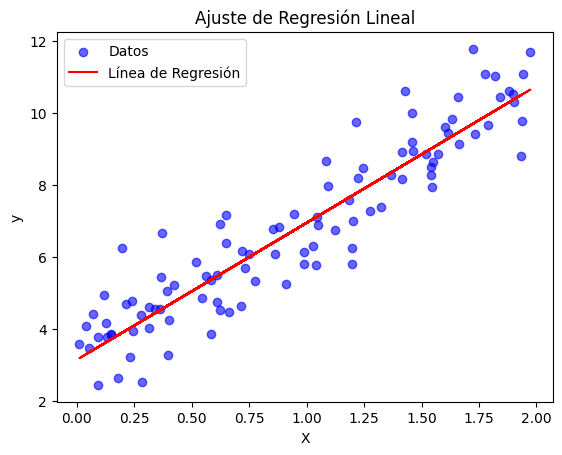

In [7]:
# Realizar predicciones en el conjunto de prueba
y_pred = lin_reg.predict(X_test)

# Calcular el Error Cuadrático Medio
mse = mean_squared_error(y_test, y_pred)
print(f"Error Cuadrático Medio (MSE): {mse:.2f}")

# Graficar la línea de regresión
plt.scatter(X, y, color="blue", alpha=0.6, label="Datos")
plt.plot(X, lin_reg.predict(X), color="red", label="Línea de Regresión")
plt.title("Ajuste de Regresión Lineal")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()


## 3. Extensiones de los Mínimos Cuadrados

### Regresión Ridge
La **Regresión Ridge** modifica el método de mínimos cuadrados añadiendo una penalización \(L2\) para evitar el sobreajuste:
$$\text{RSS} + \lambda \sum_{j=1}^p \beta_j^2$$
donde $\lambda$ es un hiperparámetro que controla la fuerza de la penalización.

A continuación, implementaremos un modelo de regresión Ridge.


In [8]:
from sklearn.linear_model import Ridge

# Entrenar el modelo de regresión Ridge
ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(X_train, y_train)

# Predecir y calcular el MSE
y_ridge_pred = ridge_reg.predict(X_test)
ridge_mse = mean_squared_error(y_test, y_ridge_pred)

print(f"Error Cuadrático Medio de Ridge: {ridge_mse:.2f}")


Error Cuadrático Medio de Ridge: 0.65


## 4. Relevancia en el Análisis de Datos Moderno

Los métodos de mínimos cuadrados son ampliamente utilizado en la mayoría de ciencias e ingenierías hoy en día. Esto se debe a que en estas áreas necesario usar experimentos cuantitativos para determinar los parámetros de interés. Para la mayoría de experimentos, se utilizan métodos de mínimos cuadrados para analizar los datos y determinar valores para los parámetros desconocidos. (Wolberg, 2006). Veamos algunos ejemplos de estos. En física, se han utilizado para ajustar valores numéricos de constantes atómicas (DuMond y Cohen, 1952); en química cuántica, se usan para encontrar relaciones linales en los datos (Löwdin, 1992). Un enfoque muy común a la hora de hacer integrar un conjunto de datos es caracterizarlo por una serie de términos exponenciales, ya que muchos sistemas son bien representados de esta forma. (Vincini et al, 2008) propone el uso de estos métodos en el área de la medicina Nuclear. Por otro lado, en área de la bioquímica, es común usar el método de mínimos cuadrados _no lineal_, en el que el modelo ya no es una función lineal de los parámetros (Johnson, 1992). En bioinformática, se suele usar Partial Least Squares (PSL). El método PSL crea variables latentes no correlacionadas que son combinaciones lineales de los vectores de entrada originales $X_i$ que son proporcionales a la covarianza. Posteriormente, un método de mínimos cuadrados clásico es utilizado en el subconjunto de variables latentes extraidas que llevan a una varianza más baja y menos sesgada en los datos transformados. Este proceso lleva a un estimado menor de varianza de los coeficientes de regresion comparado con el método tradicional de mínimos cuadrados (Land et al, 2011). 


Concluimos que el método de mínimos cuadrados es un pilar del análisis de datos moderno, debido a su simplicidad (el método clásico no es iterativo), pero al mismo tiempo al hecho de que permite interpolar una alta gama de funciones. Esto lo hace extremadamente relevante para una variedad de aplicaciones.



# Referencias

DuMond, J. W. M., & Cohen, E. R. (1953). Least-squares adjustment of the atomic constants, 1952. Reviews of Modern Physics, 25(3), 691. https://doi.org/10.1103/RevModPhys.25.691

Löwdin, P.-O. (1992). On linear algebra, the least square method, and the search for linear relations by regression analysis in quantum chemistry and other sciences. Advances in Quantum Chemistry, 23, 83–126. https://doi.org/10.1016/S0065-3276(08)60029-5

Vicini, P., Brill, A. B., Stabin, M. G., & Rescigno, A. (2008). Kinetic modeling in support of radionuclide dose assessment. Seminars in Nuclear Medicine, 38(5), 335–346. 

Johnson, M. L. (1992). Why, when, and how biochemists should use least squares. Analytical Biochemistry, 206(2), 215–225. 

Land, W. H., Jr., Ford, W., Park, J.-W., Mathur, R., Hotchkiss, N., Heine, J., Eschrich, S., Qiao, X., & Yeatman, T. (2011). Partial least squares (PLS) applied to medical bioinformatics. Procedia Computer Science, 6, 273–278. https://doi.org/10.1016/j.procs.2011.08.051